In [1]:
# Load the data
import numpy as np
import pandas as pd
df = pd.read_excel("./dataset.xlsx")
del df['Source']
df=df.replace('-',np.NAN)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_21440\3509825940.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace('-',np.NAN)


,Compressive strength of cement fce(MPa),Tensile strength of cement fct(MPa),Curing age (day),Dmax of Crushed stone (mm),Stone powder content in Sand (%),Fineness modulus of sand,W/B,Water to cement ratio mw/mc,Water (kg/m3),Sand ratio (%),Slump (mm),"Compressive strength fcu,t (MPa)","Splitting tensile strength fst,t(Mpa)"
0,46.80,8.0,3,31.5,5.0,3.34,0.56,0.56,180.00,44.0,50.0,32.50,1.18
1,46.80,8.0,3,31.5,9.0,3.27,0.56,0.56,180.00,44.0,70.0,28.70,1.13
2,46.80,8.0,3,31.5,13.0,2.77,0.56,0.56,180.00,44.0,50.0,28.50,1.56
3,46.80,8.0,7,31.5,5.0,3.34,0.56,0.56,180.00,44.0,50.0,33.50,1.39
4,46.80,8.0,7,31.5,9.0,3.27,0.56,0.56,180.00,44.0,70.0,34.90,1.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,39.42,NaN,28,12.0,19.2,NaN,0.36,0.55,178.75,54.0,135.0,41.43,3.52
707,39.42,NaN,90,12.0,19.2,NaN,0.36,0.55,178.75,54.0,135.0,52.35,3.98
708,48.07,NaN,7,12.0,19.2,NaN,0.36,0.55,178.75,54.0,140.0,42.97,3.61
709,48.07,NaN,28,12.0,19.2,NaN,0.36,0.55,178.75,54.0,140.0,46.85,4.25


In [ ]:
# Handling missing values

# Removing missing values
df_imputed=df.dropna(axis=0, how='any')
df_imputed.columns=df.columns

In [ ]:
# Imputation using mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns

In [ ]:
# Imputation using median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns

In [ ]:
# Imputation using kNN using 5 neighbours
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed=pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns=df.columns

In [ ]:
# Imputation using kNN using 10 neighbours
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_imputed=pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns=df.columns

In [ ]:
# Imputation using kNN using 15 neighbours
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=15)
df_imputed=pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns=df.columns

In [2]:
# Imputation using MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
imputer = IterativeImputer(estimator=LinearRegression(),missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df_imputed=pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns=df.columns

[IterativeImputer] Completing matrix with shape (711, 13)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Change: 135.20285325613696, scaled tolerance: 0.388 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.03
[IterativeImputer] Change: 20.25546163254625, scaled tolerance: 0.388 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.04
[IterativeImputer] Change: 11.346188432069425, scaled tolerance: 0.388 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.05
[IterativeImputer] Change: 22.17589285817553, scaled tolerance: 0.388 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.06
[IterativeImputer] Change: 24.330258727265235, scaled tolerance: 0.388 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.07
[IterativeImputer] Change: 16.62210633814889, scaled tolerance: 0.388 
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.08
[IterativeImputer] Change: 7.647188981135377

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [3]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X=df_imputed.drop(['Compressive strength of  cement fce(MPa)','Tensile strength of cement fct(MPa)'],axis=1)
y=df_imputed['Tensile strength of cement fct(MPa)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Featurisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Mean squared error:  0.3270578578538566
R2 accuracy 0.44251835530012873


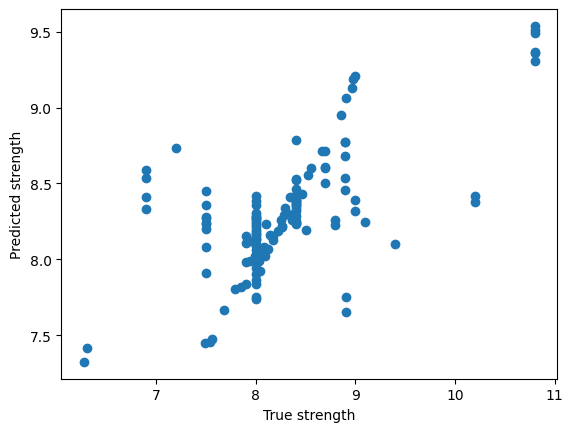

In [4]:
#Different Models

# Linear Regression
# Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
from sklearn.metrics import r2_score
print("R2 accuracy",r2_score(y_test, y_pred))

# Interpret the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True strength")
plt.ylabel("Predicted strength")
plt.show()

Mean squared error:  0.16963640527350624
R2 accuracy 0.7108487689810966


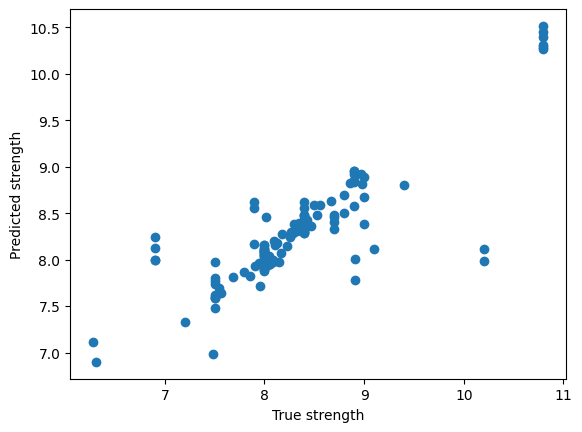

In [5]:
# SVM
from sklearn.svm import SVR
classifier = SVR()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
print("R2 accuracy",r2_score(y_test, y_pred))

# Interpret the results
plt.scatter(y_test, y_pred)
plt.xlabel("True strength")
plt.ylabel("Predicted strength")
plt.show()

In [6]:
# Meta Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
lin = LinearRegression()
rnd = RandomForestRegressor(n_estimators=100)
svm = SVR()
voting = VotingRegressor(estimators=[('linear_regression', lin), ('random_forest', rnd), ('support_vector_machine', svm)])
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_regression', LinearRegression()),
                            ('random_forest', RandomForestRegressor()),
                            ('support_vector_machine', SVR())])

In [45]:
# Evaluate Meta Model
for clf in (lin, rnd, svm, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, r2_score(y_test, y_pred))

LinearRegression 0.44251835530012873
RandomForestRegressor 0.9537858048843786
SVR 0.7108487689810966
VotingRegressor 0.7797521466718743


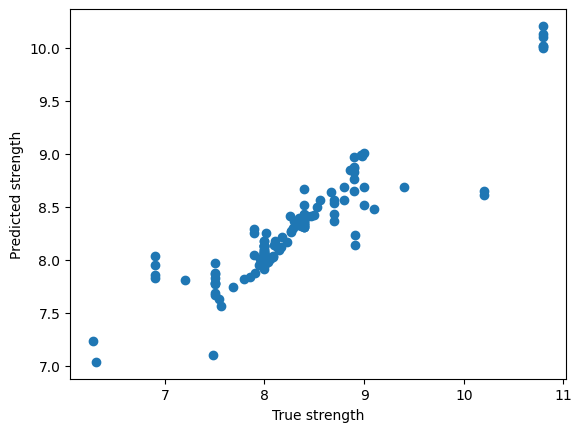

In [8]:
# Interpret the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True strength")
plt.ylabel("Predicted strength")
plt.show()